# **Women safety Analysis**
## **1. Business Understanding**
### Analysis to study the trend in the most offensive crime against women "Rape" and predictions to alert the authorities.
1) State wise trend in rape cases.  
2) Year wise incerament curve in india  
3) situation in last 8 years in particular states   
4) predict future years increase in cases
     
## **2. Data Understanding**
In this section, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [47]:
#importing libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from pylab import MaxNLocator
 
data=pd.read_csv("TABLE 28-2001.csv")

data.head()

,s.no,state_ut,total_rape,upto 10 years,10-14 years,14-18 years,18-30 years,30-35 years,Above 50 years,year
0,1,ANDHRA PRADESH,871,57,138,254,328,80,14,2001
1,2,ARUNACHAL PRADESH,33,0,0,1,28,4,0,2001
2,3,ASSAM,817,8,73,245,370,119,2,2001
3,4,BIHAR,888,1,15,198,562,112,0,2001
4,5,CHHATTISGARH,959,25,191,218,384,137,4,2001


#### Checking for null values

In [48]:
#check 
data.isna().sum()
#Upper case all the state names 
data["state_ut"]=data["state_ut"].str.upper() 
data.head()


,s.no,state_ut,total_rape,upto 10 years,10-14 years,14-18 years,18-30 years,30-35 years,Above 50 years,year
0,1,ANDHRA PRADESH,871,57,138,254,328,80,14,2001
1,2,ARUNACHAL PRADESH,33,0,0,1,28,4,0,2001
2,3,ASSAM,817,8,73,245,370,119,2,2001
3,4,BIHAR,888,1,15,198,562,112,0,2001
4,5,CHHATTISGARH,959,25,191,218,384,137,4,2001


#### Finding datatypes of different columns to check whether any coulnm has wrong datatype

In [49]:
data.dtypes #column's datatype

s.no               int64
state_ut          object
total_rape         int64
upto 10 years      int64
10-14 years        int64
14-18 years        int64
18-30 years        int64
30-35 years        int64
Above 50 years     int64
year               int64
dtype: object


## **3. Prepare Data**
### **A. Year wise increment curve in india.**

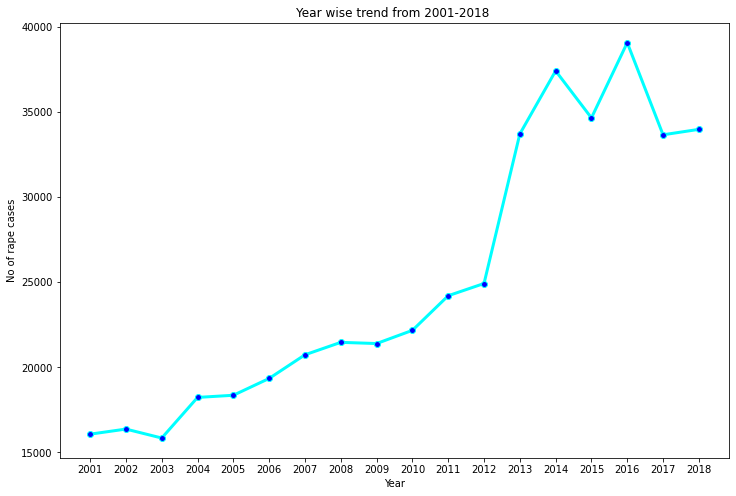

In [50]:

# grouping year wise and summing the total cases.
data.groupby('year')['total_rape'].sum().plot(kind='line',color='cyan',linewidth = 3, figsize=(12, 8),
         marker='o', markerfacecolor='blue')
plt.xlabel('Year') 
# naming the y axis 
plt.ylabel('No of rape cases') 
plt.xticks(np.arange(2001, 2019, 1))
# giving a title to my graph 
plt.title('Year wise trend from 2001-2018 ') 
plt.show()


### **B. State wise trend in rape cases.**

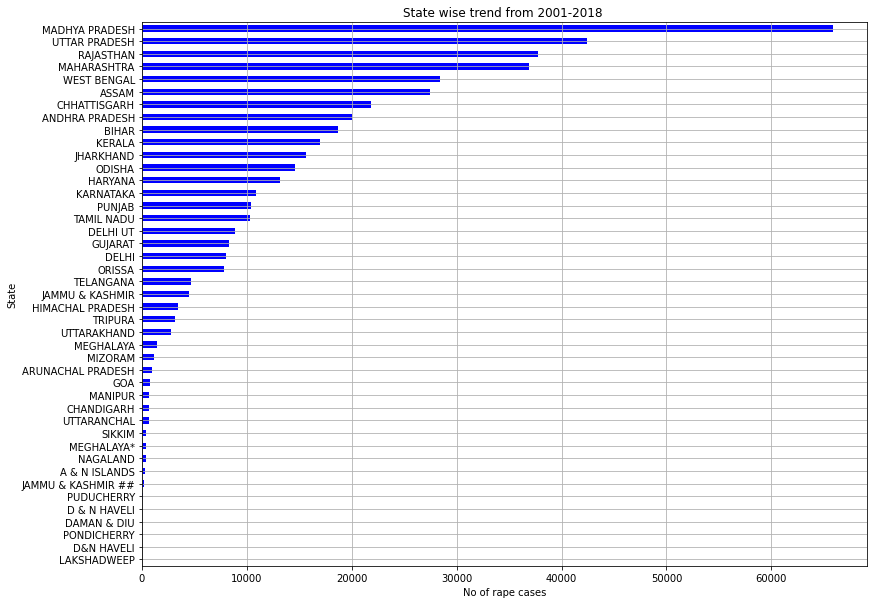

In [51]:
# grouping data state-wise
data.groupby('state_ut')['total_rape'].sum().sort_values().plot(kind='barh',color='blue',width=0.5,grid=True,figsize=(13, 10))

plt.xlabel('No of rape cases') 
# naming the y axis 
plt.ylabel('State') 
  
# giving a title to my graph 
plt.title('State wise trend from 2001-2018 ') 
plt.show()

### **C. Comparison in cases in different states in past 18 years**

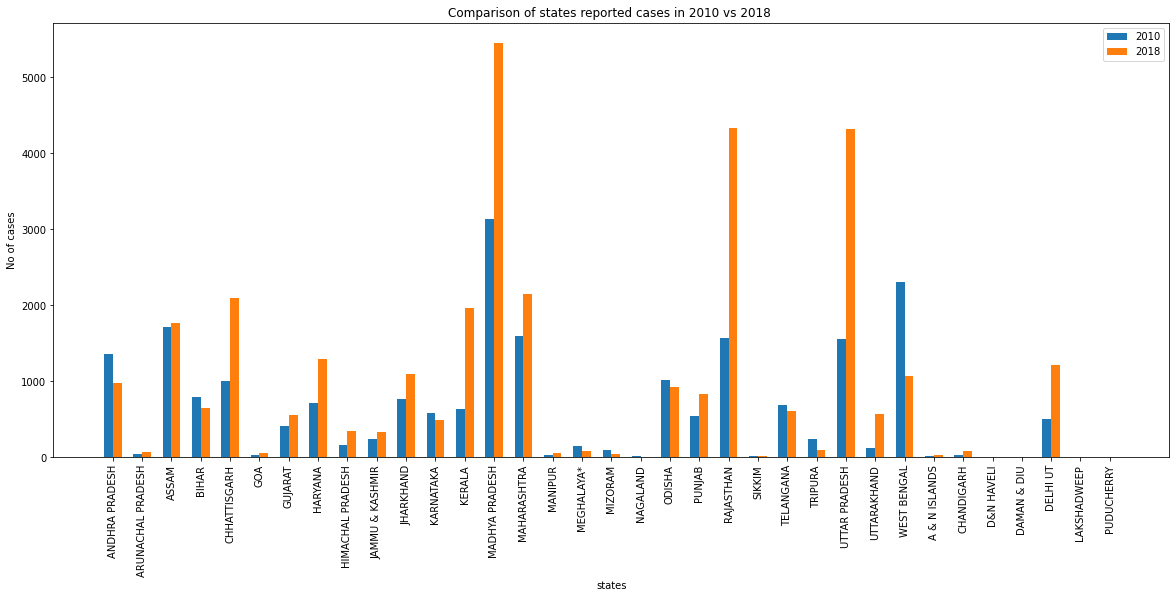

In [52]:
#increament or decreament in cases in differen states in past 18 years
data=data.drop(data.index[550])
index = np.arange(data[data['year'] == 2010]['state_ut'].shape[0])
bar_width = 0.3
fig, ax = plt.subplots(figsize=(20,8))
summer = ax.bar(index, data[data['year'] == 2010]['total_rape'], bar_width, label="2010",)
winter = ax.bar(index+bar_width, data[data['year'] == 2018]['total_rape'],bar_width, label="2018")

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(list(data[data['year'] == 2018]['state_ut']))
ax.autoscale_view()
ax.legend()
plt.xticks(rotation=90)
plt.xlabel('states') 
# naming the y axis 
plt.ylabel('No of cases') 
  
# giving a title to my graph 
plt.title('Comparison of states reported cases in 2010 vs 2018 ') 
plt.show()



### **Preparing data for modelling**

In [53]:
# perparing data for model prediction
df=data
# drop the columns as they do not answer the above required quesions, Age groups have no effect on future no of cases as we already summed up those in "total-rape colunn"    
df=df.drop(columns=['upto 10 years','10-14 years','14-18 years','18-30 years','30-35 years','Above 50 years','s.no'], axis=1)
print(df.head())

# handle categorial variales
cat_cols=['state_ut']
for col in cat_cols:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
# shape of data after handlin gcaetgorial variables 
df.shape


            state_ut  total_rape  year
0     ANDHRA PRADESH         871  2001
1  ARUNACHAL PRADESH          33  2001
2              ASSAM         817  2001
3              BIHAR         888  2001
4       CHHATTISGARH         959  2001


(634, 44)

### **D. Predict future years increase in total number of cases in india in 2020**
## **4. Modeling**

(18, 1)
Expected no of cases in 2020: [38894.84178499]


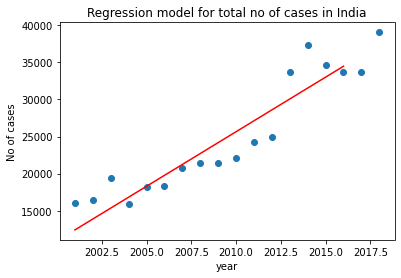

Train score for the model: 0.8629404590839872
Test score for the model: 0.9081699070967715


In [56]:
# define dependent and independent variables
y = data.groupby('year')['total_rape'].sum()
p=df['year'].unique().reshape(-1, 1)
print(p.shape)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(p, y, test_size=0.1, random_state=32)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
input=[[2019]]
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
    
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
y_preds = lm_model.predict(input)

print("Expected no of cases in 2020: {}".format(y_preds))

plt.scatter(p, y)
plt.plot(X_test, y_test_preds, color='red')
plt.xlabel('year') 
# naming the y axis 
plt.ylabel('No of cases') 
  
# giving a title to my graph 
plt.title('Regression model for total no of cases in India') 
plt.show()

print("Train score for the model: {}".format(train_score))
print("Test score for the model: {}".format(test_score))


### **E. Predict future years increase in cases and plot for particular states**

Expected cases in DELHI in year 2020 is: 1354
Expected cases in MADHYA PRADESH in year 2020 is: 5494
Expected cases in UTTAR PRADESH in year 2020 is: 4383
Expected cases in MAHARASHTRA in year 2020 is: 3112


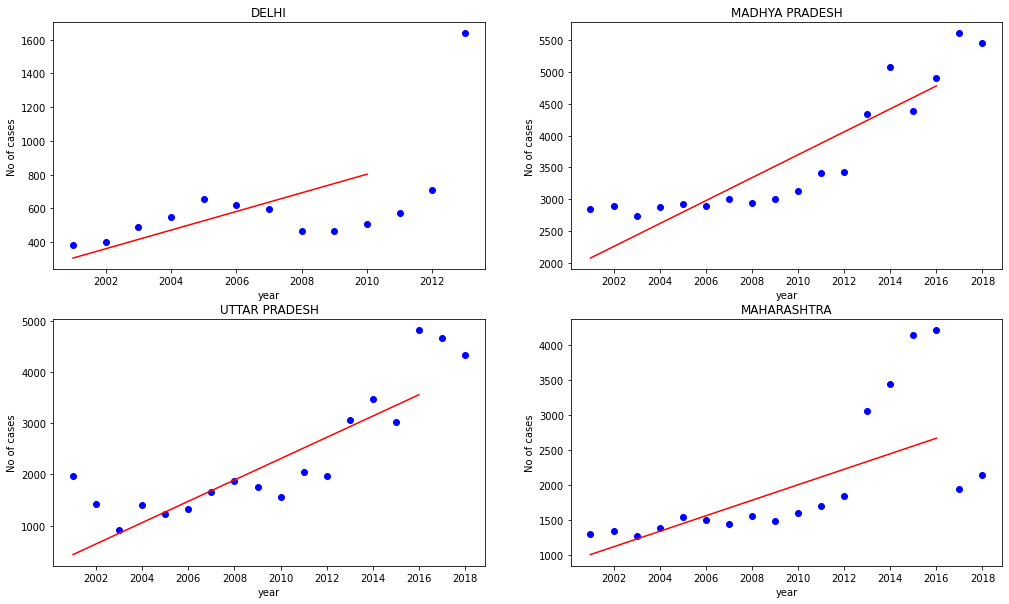

In [57]:
def prediction_state_wise(state):
    """
    This function takes state as input, separate the x and y variables, split data into train and test, train the model and use it to predict futurre cases 
    and plot rregression line and scatte plot for better visualization.
    Args: state
    return: y - total rape cases in a particular state year wise
            p - Years in ascending order
            X_test - test values
            y_test_preds - perdicted y values 
    """
    y = data[ data['state_ut']==state]['total_rape']
    p=np.array(data[data['state_ut']==state]['year']).reshape(-1, 1)

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(p, y, test_size=0.1, random_state=32)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    input=[[2020]]
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    y_preds = lm_model.predict(input)
    print("Expected cases in {} in year 2020 is: {}".format(state,int(y_preds)))
    
    return p,y,X_test,y_test_preds

# list of states to be predicted
states_pred=['DELHI','MADHYA PRADESH','UTTAR PRADESH','MAHARASHTRA']

# plots for particular states
fig, axs = plt.subplots(2, 2,figsize=(17,10))
plt.setp(axs, xticks=[2002,2004,2006,2008,2010,2012,2014,2016,2018])
i=0
j=0
for state in states_pred:
    p,y,X_test,y_test_preds=prediction_state_wise(state)
    axs[i,j].scatter(p, y,color="blue")
    axs[i,j].plot(X_test, y_test_preds, color='red')
    axs[i,j].set_title(state)
    j+=1
    if(j==2):
        i+=1
        j=0

for ax in axs.flat:
    ax.set(xlabel='year', ylabel='No of cases') 



## **5. Evaluation of results**
A. Number of rape cases jumped from 16,000 in 2001 to approx 21,000 in 2009 and in the next 9 years it touches 33,000!       
    
B. Madhya Pradesh reported a large number of cases since 2001, presently reaching a bar of more than 65,000 cases. Orissa, Gujarat and Delhi standing in the    
midst with Daman & Diu, Pondicherry, Dadra & Nagar Haveli, Lakshadweep showing the minimum count. Though population density also plays a major role in     predicting the most prone areas, but this stat shows the overall numbers.
    
C. Rajasthan and Utttar Pradesh showed a hueg spike in cases.    

D. In year 2020 total rape cases are expecetd to touch 38894.     

E. According to the above predictions, in 2020, Delhi is expected to see approx 1354 cases, Madhya Pradesh showing up 5494, Uttar Pradesh 4383 and Maharashtra 3112, if the present trend continues.    


## **6. Conclusion**
The sharp growth or decline in number of cases given in the data does not really confirm about the present situation. There is a much need to encourage women speak against any sort to humiliation and to build their trust on the judicial system.    
1.The states that experienced a rise in cases should have a screening to tackle the same.    
2.Future trends of crime should be kept in mind for further amendments.    
So now is the call for both the authorities and women themselves to come up with measures to control this rapid growing disease. Women have to take the     
responsibility to ensure their safety otherwise the above trend will keep on rising.    
